<a href="https://colab.research.google.com/github/SehanArandara/DL-Assignment-SLIIT-2024/blob/sehan/IT21164330.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets


In [2]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
od.download('https://www.kaggle.com/datasets/erdemtaha/cancer-data/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sehanarandara
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/erdemtaha/cancer-data


100%|██████████| 48.6k/48.6k [00:00<00:00, 34.0MB/s]

In [7]:
df = pd.read_csv('/content/cancer-data/Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
# Lets start the data preprocessing

In [9]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [10]:
# Drop the ID and the Unname : 32 feature
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])


In [17]:
df['diagnosis'].head()  , df['diagnosis'].tail()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: diagnosis, dtype: int64,
 564    1
 565    1
 566    1
 567    1
 568    0
 Name: diagnosis, dtype: int64)

In [19]:
df['diagnosis'].value_counts()    # Begineer cancer -> 0 and Maligant Cancer -> 1

,count
diagnosis,
0,357
1,212


In [20]:
# Feature Selection -->

#Calculate correlational matrix
corr_matrix = df.corr()

corr_target = corr_matrix['diagnosis']

corr_best =  corr_target[corr_target > 0.5]

corr_best


,diagnosis
diagnosis,1.000000
radius_mean,0.730029
perimeter_mean,0.742636
area_mean,0.708984
compactness_mean,0.596534
concavity_mean,0.696360
concave points_mean,0.776614
radius_se,0.567134
perimeter_se,0.556141
area_se,0.548236


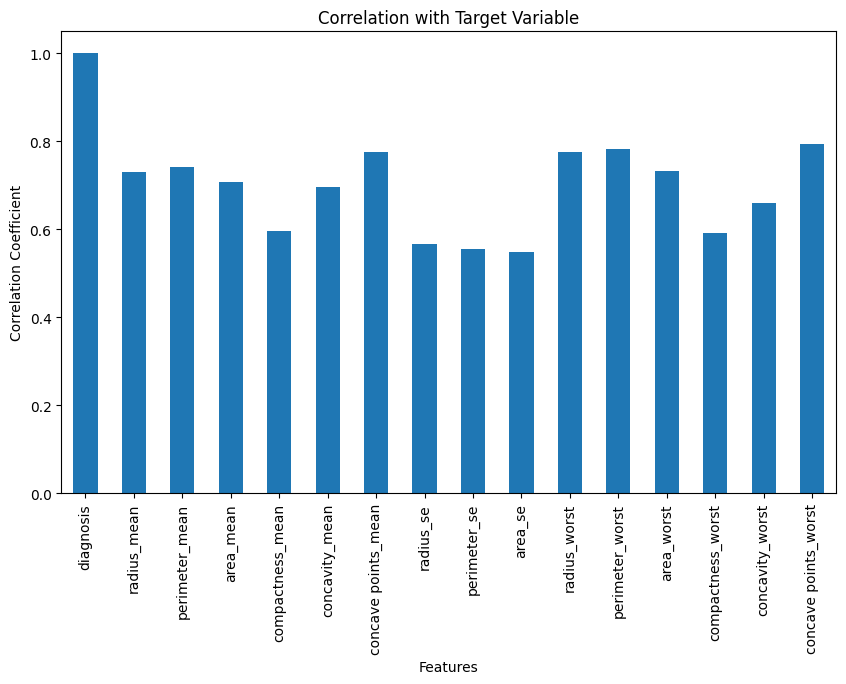

In [21]:
# plot to show the correlation with x and y labels
plt.figure(figsize=(10, 6))
corr_best.plot(kind='bar')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

In [28]:
# so we select best features from the data set
# df.shape
# corr_best.shape


In [31]:
corr_best = corr_best.index.tolist()
new_df = df[corr_best]
new_df.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625


In [33]:
# Split the the data set
from sklearn.model_selection import train_test_split

X = new_df.drop('diagnosis',axis=1)
y = new_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape , X_test.shape ,X.shape

((455, 15), (114, 15), (569, 15))

In [64]:
# Create the model
model_old = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(15,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_old.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_old.fit(X_train, y_train, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5751 - loss: 9.6248 
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 0.6940 
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4191 - loss: 0.6933 
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6020 - loss: 0.6922 
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6045 - loss: 0.6912 
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6118 - loss: 0.6901 
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6589 - loss: 0.6873 
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6036 - loss: 0.6883 
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.6858 
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6491 - loss: 0.6834  


In [61]:
model_old.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9564 - loss: 0.1050  


[0.10761222243309021, 0.9561403393745422]

In [62]:
y_pred = model_old.predict(X_test)
y_pred[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.74595445],
       [1.        ],
       [0.9999997 ],
       [0.00310427],
       [0.00942404]], dtype=float32)

In [63]:
y_test[:5]

,diagnosis
204,0
70,1
131,1
431,0
540,0


In [68]:
# Create the model
model_final = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(15,), kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),  # Increased dropout to prevent overfitting early

    tf.keras.layers.Dense(64, kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.3),  # More regularization to improve training accuracy

    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduced learning rate for more precise training
model_final.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback with patience of 15 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model_final.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,  # Increased batch size to 32 for smoother gradient updates
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3789 - loss: 1.1393 - val_accuracy: 0.6228 - val_loss: 1.9215
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4607 - loss: 0.9505 - val_accuracy: 0.6140 - val_loss: 1.1044
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5474 - loss: 0.8787 - val_accuracy: 0.4386 - val_loss: 0.8179
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5770 - loss: 0.7603 - val_accuracy: 0.5877 - val_loss: 0.6953
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5967 - loss: 0.7126 - val_accuracy: 0.5439 - val_loss: 0.6262
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7199 - loss: 0.6014 - val_accuracy: 0.7018 - val_loss: 0.5638
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7383 - loss: 0.5655 - val_accuracy: 0.7544 - val_loss: 0.5056
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7664 - loss: 0.5260 - val_accuracy: 0.8333 - val_loss: 0.

In [69]:
model_final.evaluate(X_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.1156 


[0.1236964613199234, 0.9824561476707458]

In [70]:
y_pred=model_final.predict(X_test)
y_pred[:10]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0.30572093],
       [0.9908523 ],
       [0.88255966],
       [0.02237017],
       [0.0174853 ],
       [0.9916228 ],
       [0.99841744],
       [0.8910825 ],
       [0.0563788 ],
       [0.1228723 ]], dtype=float32)

In [71]:
y_test[:10]

,diagnosis
204,0
70,1
131,1
431,0
540,0
567,1
369,1
29,1
81,0
477,0


In [72]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']



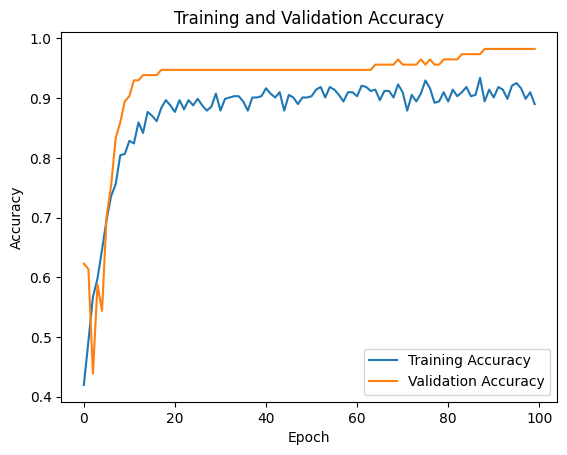

In [73]:
# Plotting accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

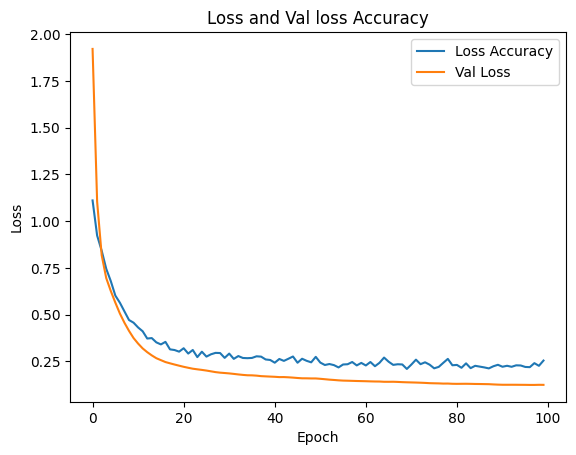

In [74]:
# Plotting loss
plt.plot(loss, label='Loss Accuracy')
plt.plot(val_loss, label='Val Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss and Val loss Accuracy')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

# convert y_pred values into 0 and 1
y_pred_new= []
for i in y_pred:
  if i>0.5:
    y_pred_new.append(1)
  else:
    y_pred_new.append(0)

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Text(95.72222222222221, 0.5, 'Truth')

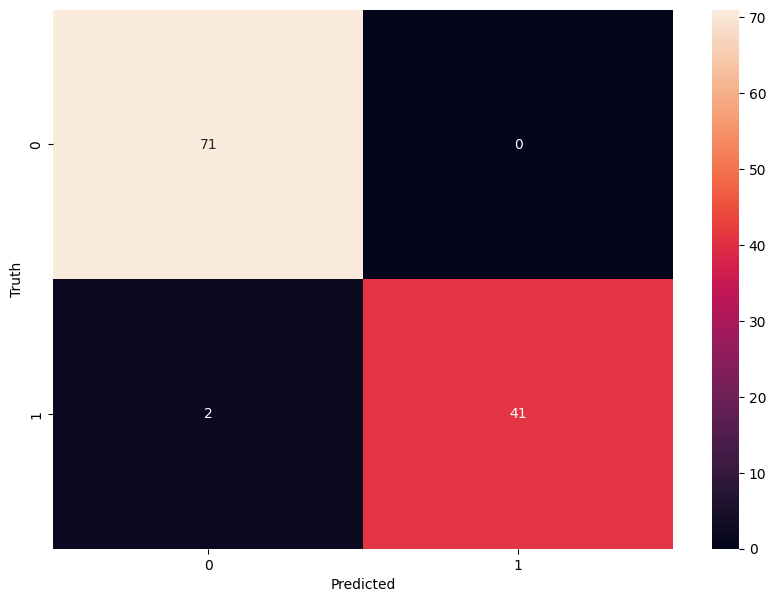

In [78]:
import seaborn as sn


cm = tf.math.confusion_matrix(y_test, y_pred_new)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
# calculate the Accuracy , Precision ,Recall and F1
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred_new)
precision = precision_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new)
f1 = f1_score(y_test,y_pred_new)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1",f1)

# fine tune 01 done

Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9534883720930233
F1 0.9761904761904762
